<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/NaverFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번 예제에서는 KISLINE(http://media.kisline.com/highlight/mainHighlight.nice?nav=1&paper_stock=005930) 사이트에서 삼성전자(005930)의 재무정보를 가져와 보겠습니다. url 마지막 부분에 "paper_stock=005930"에서 숫자 6자리가 주식종목코드입니다. 이 부분을 바꿔주면 원하는 상장회사의 재무정보가 있는 KISLINE 웹페이지를 호출할 수 있습니다.

In [0]:
import pandas as pd
 
#html 객체의 표(table)를 pandas dataframe으로 가져온다 
url = 'http://media.kisline.com/highlight/mainHighlight.nice?nav=1&paper_stock=005930'
tables = pd.read_html(url)
 
#엑셀로 저장하기
df = tables[4]    #개별IFRS 연간 재무제표
df.to_excel('output.xlsx')

네이버 등 포털 사이트에서 제공하는 주식시세(주가정보) 데이터를 가져와서, 그래프로 간략하게 그려보는 예제를 만들어 봅니다. 처음에는 코드 한줄 한줄 전부 이해하는 것보다는 예제 코드를 최대한 타이핑해보면서 실행 결과를 확인해 보면서 흥미를 갖는 것이 중요합니다.
 
지난 포스팅에서 설명드린 pandas.read_html 함수를 사용해서 네이버 주식 시세 테이블을 dataframe으로 가져옵니다. 아래 그림처럼 주식시세가 웹페이지 여러 페이지에 걸쳐 있기 때문에, 페이지를 한장씩 넘어가면서 pandas.read_html 함수를 사용하여 표를 여러 번 나누어서 읽어야 합니다.

In [0]:
 import pandas as pd  # 데이터프레임을 다루는 패키지
 import datetime as dt  # 시간을 다루는 패키지
 import matplotlib.pyplot as plt  # 그래프 시각화 패키지
 from matplotlib import style 

In [0]:
def read_stock_price_page(stock_code, page_num):
    '''
    네이버 주식시세 페이지에 접속하여 table을 dataframe으로 가져와서 정리
    '''
    target_url = ('http://finance.naver.com/item/sise_day.nhn?code='+ stock_code + '&page=' + str(page_num))
    data = pd.read_html(target_url)
    data = data[0]
    data.columns = ['날짜', '당일종가', '전일종가', '시가', '고가', '저가', '거래량']
    price_data = data.dropna(axis=0, how='any')
    price_data = price_data.drop(price_data.index[0])
    price_data = price_data.reset_index(drop=True)
    price_data['날짜'] = pd.to_datetime(price_data['날짜'], format='%Y/%m/%d')
    return price_data

In [0]:
def stock_price_pages_to_df(code, days_limit=30):
    '''
    오늘부터 days_limit 일수 만큼 이전 날짜 주가를 가져온다. 
    '''
    
    df_list_price = []
    page = 1
    while True:
        try:    
            data = read_stock_price_page(code, page)
            time_limit = dt.datetime.now() - data['날짜'][0]  
            if time_limit.days > days_limit: break   
            df_list_price.append(data)                     
            page = page + 1
    
        except: break
    df_price = pd.concat(df_list_price)
    df_price = df_price.reset_index(drop=True)
    return df_price

In [0]:
# 함수를 실행하여 KH바텍(060720)의 과거 30일 주가정보를 가져온다.    
 stock_code = '060720'
 days_limit = 30
 df = stock_price_pages_to_df(stock_code, days_limit)

In [13]:
df

,날짜,당일종가,전일종가,시가,고가,저가,거래량
0,2019-03-07,9430,30,9330,9600,9320,122448
1,2019-03-06,9400,180,9600,9740,9400,142568
2,2019-03-05,9580,170,9280,9610,9270,232251
3,2019-03-04,9410,290,9070,9520,9070,278830
4,2019-02-28,9120,390,9480,9490,9100,341641
5,2019-02-27,9510,310,9780,9790,9460,414758
6,2019-02-26,9820,380,10350,10400,9800,559241
7,2019-02-25,10200,620,9650,10250,9630,762481
8,2019-02-22,9580,120,9620,9760,9420,385082
9,2019-02-21,9460,520,10300,10600,9450,1270555


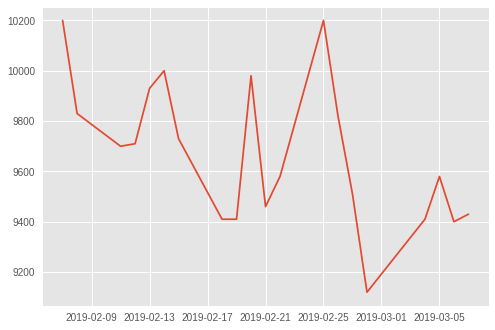

In [14]:
# 주식 시세(당일종가) 그래프를 그린다.
 style.use('ggplot')   #그래프 스타일 지정
 plt.plot(df.날짜, df.당일종가.astype(int))  
 plt.show()

오늘 판다스(pandas) 모듈로 데이터를 수집하려는 네이버 환율조회(https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%99%98%EC%9C%A8%EC%A1%B0%ED%9A%8C) 화면을 살펴보면, 아래와 같이 웹 페이지 중간에 미국 달러 환율 그래프가 있고 하단에 미국, 일본 등 8개 국가 통화에 대한 원화 환율(매매기준율)이 표(table) 형식으로 정리되어 있습니다.  

In [15]:
url ='https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%99%98%EC%9C%A8%EC%A1%B0%ED%9A%8C'

tables = pd.read_html(url)
tables

[    일   월   화   수   목   금   토
 0 NaN NaN NaN NaN NaN NaN NaN,           통화명    매매기준율        전일대비     등락률
 0      미국 USD  1129.00  전일대비보합0.00   0.00%
 1  일본 JPY 100  1010.25  전일대비상승1.09  +0.11%
 2    유럽연합 EUR  1277.12  전일대비상승1.01  +0.08%
 3      중국 CNY   168.11  전일대비보합0.00   0.00%
 4      영국 GBP  1486.55  전일대비상승2.93  +0.20%
 5      호주 AUD   795.04  전일대비상승1.58  +0.20%
 6     캐나다 CAD   840.03  전일대비하락3.74  -0.44%
 7    뉴질랜드 NZD   765.74  전일대비상승0.73  +0.10%]

In [16]:
len(tables)

2

In [18]:
tables[1]

,통화명,매매기준율,전일대비,등락률
0,미국 USD,1129.00,전일대비보합0.00,0.00%
1,일본 JPY 100,1010.25,전일대비상승1.09,+0.11%
2,유럽연합 EUR,1277.12,전일대비상승1.01,+0.08%
3,중국 CNY,168.11,전일대비보합0.00,0.00%
4,영국 GBP,1486.55,전일대비상승2.93,+0.20%
5,호주 AUD,795.04,전일대비상승1.58,+0.20%
6,캐나다 CAD,840.03,전일대비하락3.74,-0.44%
7,뉴질랜드 NZD,765.74,전일대비상승0.73,+0.10%


In [0]:
df = tables[1]
df.to_csv('exchange_rate.csv')

In [21]:
exchange_data = pd.read_csv('exchange_rate.csv')
exchange_data

,Unnamed: 0,통화명,매매기준율,전일대비,등락률
0,0,미국 USD,1129.00,전일대비보합0.00,0.00%
1,1,일본 JPY 100,1010.25,전일대비상승1.09,+0.11%
2,2,유럽연합 EUR,1277.12,전일대비상승1.01,+0.08%
3,3,중국 CNY,168.11,전일대비보합0.00,0.00%
4,4,영국 GBP,1486.55,전일대비상승2.93,+0.20%
5,5,호주 AUD,795.04,전일대비상승1.58,+0.20%
6,6,캐나다 CAD,840.03,전일대비하락3.74,-0.44%
7,7,뉴질랜드 NZD,765.74,전일대비상승0.73,+0.10%


이 URL을 가지고 현재 사이트의 HTML 문서를 Requests와 BeautifulSoup 라이브러리를 이용해 가져올 것입니다. 다음 코드를 이용해서요

출처: https://engkimbs.tistory.com/624 [프로그래밍 자료 저장소]

In [26]:
import requests
from bs4 import BeautifulSoup

URL = "https://finance.naver.com/item/main.nhn?code=005930"

samsung_electronic = requests.get(URL)
html = samsung_electronic.text

soup = BeautifulSoup(html, 'html.parser')

finance_html = soup.select('div.section.cop_analysis div.sub_section')[0]
print(finance_html)

<div class="sub_section">
<table class="tb_type1 tb_num tb_type1_ifrs" summary="기업실적분석에 관한표이며 주요재무정보를 최근 연간 실적, 분기 실적에 따라 정보를 제공합니다.">
<caption>기업실적분석 테이블</caption>
<colgroup>
<col width="86"/>
<col width="59"/>
<col width="59"/>
<col width="59"/>
<col width="62"/>
<col width="58"/>
<col width="58"/>
<col width="58"/>
<col width="58"/>
<col/>
</colgroup>
<thead>
<tr class="t_line">
<th class="h_th2 th_cop_anal5 b_line" rowspan="3"><strong>주요재무정보</strong></th>
<th class="h_th2 th_cop_anal6" colspan="4" scope="col"><strong>최근 연간 실적</strong></th>
<th class="h_th2 th_cop_anal7 last" colspan="6" scope="col"><strong>최근 분기 실적</strong></th>
</tr>
<tr>
<th class="" scope="col">
										2016.12
									</th>
<th class="" scope="col">
										2017.12
									</th>
<th class="" scope="col">
										2018.12
									</th>
<th class="t_line cell_strong" scope="col">
										2019.12<em>(E)</em>
</th>
<th class="" scope="col">
										2017.12
									</th>
<th class="" scope="col">
						

In [0]:
th_data = [item.get_text().strip() for item in finance_html.select('thead th')]
annual_date = th_data[3:7]
quarter_date = th_data[7:13]

finance_index = [item.get_text().strip() for item in finance_html.select('th.h_th2')][3:]

finance_data = [item.get_text().strip() for item in finance_html.select('td')]

In [0]:
import numpy as np

finance_data = np.array(finance_data)
finance_data.resize(len(finance_index), 10)

In [31]:
finance_date = annual_date + quarter_date

finance = pd.DataFrame(data=finance_data[0:,0:], index=finance_index, columns=finance_date)
finance

,2016.12,2017.12,2018.12,2019.12(E),2017.12,2018.03,2018.06,2018.09,2018.12,2019.03(E)
매출액,"2,018,667","2,395,754","2,437,714","2,274,360","659,784","605,637","584,827","654,600","592,650","540,164"
영업이익,"292,407","536,450","588,867","376,046","151,470","156,422","148,690","175,749","108,006","85,636"
당기순이익,"227,261","421,867","443,449","300,359","122,551","116,885","110,434","131,507","84,622","72,214"
영업이익률,14.49,22.39,24.16,16.53,22.96,25.83,25.42,26.85,18.22,15.85
순이익률,11.26,17.61,18.19,13.21,18.57,19.30,18.88,20.09,14.28,13.37
ROE(지배주주),12.48,21.01,19.63,11.76,21.01,22.79,21.77,21.73,19.63,
부채비율,35.87,40.68,36.97,,40.68,39.96,36.70,39.28,36.97,
당좌비율,223.46,181.61,204.12,,181.61,188.10,197.58,198.16,204.12,
유보율,"22,004.14","24,536.12","27,531.92",,"24,536.12","25,279.75","26,235.70","27,412.63","27,531.92",
EPS(원),"2,735","5,421","6,024","4,330","1,629","1,583","1,500","1,771","1,163",999


In [0]:
annual_finance = finance.iloc[:, :4]
quarter_finance = finance.iloc[:, 4:]